In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [56]:
dataset = pd.read_csv(r"D:\internship\New folder 1\data.csv", on_bad_lines='skip')

In [57]:
##Lets check the head of our data
dataset.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [58]:
##Lets check the shape of data
dataset.shape

(669640, 2)

In [59]:
##Checking the unique values in strength
dataset["strength"].unique()

array([1, 2, 0], dtype=int64)

### There are only 3 classes in strength
### 0->Password is weak
### 1->Normal password
### 2->Strong password

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [61]:
##Lets see if there are any null values in dataset
dataset.isnull().sum()

password    1
strength    0
dtype: int64

There is 1 null value in password

In [62]:
##Lets check the record where our value is null
dataset[dataset["password"].isnull()]

,password,strength
367579,NaN,0


As there is only 1 record we can drop our nan values

In [63]:
dataset.dropna(inplace=True)

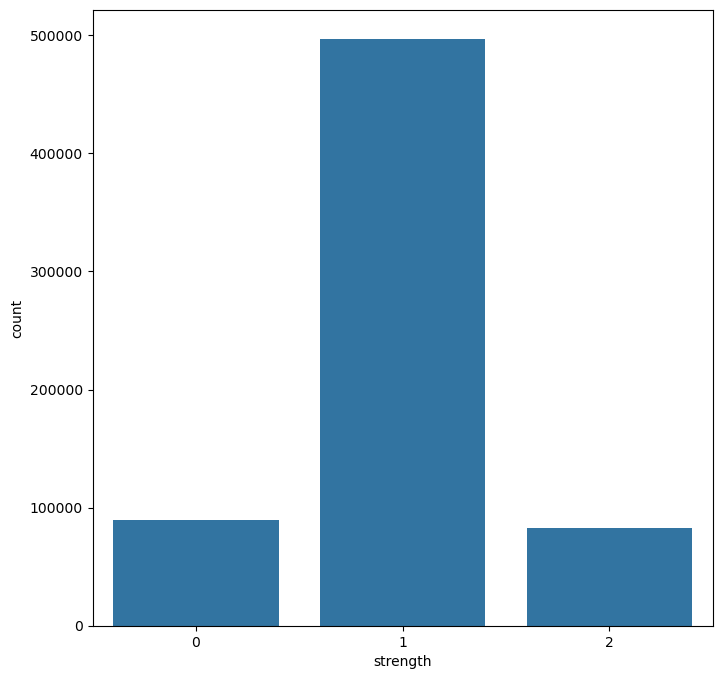

In [64]:
plt.figure(figsize=(8, 8))
sns.countplot(x=dataset['strength'])
plt.show()

As we can see count of class 1 is every high compared to class 0 and class 2

In [65]:
##I'll convert my data to array
password_=np.array(dataset)
password_

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [66]:
type(password_)

numpy.ndarray

In [67]:
password_[0]

array(['kzde5577', 1], dtype=object)

In [68]:
##Extracting the password from data
password_[0][0]

'kzde5577'

In [69]:
import random
random.shuffle(password_)

In [70]:
password_

array([['kzde5577', 1],
       ['kino3434', 1],
       ['kino3434', 1],
       ...,
       ['iYVKcwjExMQPF8Xc', 2],
       ['kgpm7832', 1],
       ['cfgeet1234', 1]], dtype=object)

In [71]:
##Create my dependant and independant feature
X=[passwords[0] for passwords in password_]
y=[passwords[1] for passwords in password_]

In [72]:
##Lets check passwords
X

['kzde5577',
 'kino3434',
 'kino3434',
 'kzde5577',
 'visi7k1yr',
 'visi7k1yr',
 'AVYq1lDE4MgAZfNt',
 'u6c8vhow',
 'universe2908',
 'kino3434',
 'v1118714',
 'megzy123',
 'lamborghin1',
 'u6c8vhow',
 'lamborghin1',
 'lamborghin1',
 'g067057895',
 'lamborghin1',
 '6975038lp',
 'as326159',
 'WUt9IZzE0OQ7PkNE',
 'idofo673',
 'intel1',
 'kzde5577',
 '52558000aaa',
 'cigicigi123',
 'kzde5577',
 'idofo673',
 'AVYq1lDE4MgAZfNt',
 'v1118714',
 'gaymaids1',
 'trabajonet9',
 'prisonbreak1',
 'intel1',
 'as326159',
 'lsdlsd1',
 'schalke04',
 'universe2908',
 'lsdlsd1',
 'intel1',
 'gaymaids1',
 'fahad123',
 'asgaliu11',
 'fk9qi21m',
 'asv5o9yu',
 'exitos2009',
 'alimagik1',
 'as326159',
 'memjan123',
 'go7kew7a2po',
 'gaymaids1',
 'ok>bdk',
 'hpqkoxsn5',
 'as326159',
 'ejeko677',
 'lamborghin1',
 'universe2908',
 '612035180tok',
 'elyass15@ajilent-ci',
 '6975038lp',
 'faranumar91',
 'yk530mg8',
 'fahad123',
 'bozoxik602',
 'matiofox08',
 'u6c8vhow',
 'visi7k1yr',
 'calcifer32',
 'kswa2mrv',
 'kin

In [73]:
type(X)

list

In [74]:
##Convert words into characters
def make_chars(inputs):
    characters=[]
    for letter in inputs:
        characters.append(letter)
    return characters

In [75]:
make_chars("Vibhav")

['V', 'i', 'b', 'h', 'a', 'v']

In [76]:
vectorizer=TfidfVectorizer(tokenizer=make_chars)

In [77]:
X_=vectorizer.fit_transform(X)

In [78]:
X_.shape

(669639, 128)

In [79]:
vectorizer.get_feature_names_out()


array(['\x04', '\x05', '\x08', '\x0e', '\x10', '\x11', '\x12', '\x16',
       '\x17', '\x18', '\x19', '\x1b', '\x1c', '\x1e', ' ', '!', '"', '#',
       '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?', '@',
       '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g',
       'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
       'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\xa0', '¡', '¨',
       '«', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¹', 'º', '¾', '¿',
       'ß', 'à', 'á', 'â', 'ä', 'å', 'æ', 'ç', 'è', 'ê', 'í', 'ï', 'ð',
       'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ù', 'ú', 'û', 'ü', 'ý', 'þ',
       'ÿ', 'œ', '—', '‚', '‹', '›'], dtype=object)

In [80]:
X_[0]

<1x128 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [81]:
first_=X_[0].T.todense()

In [82]:
vec = pd.DataFrame(first_, index=vectorizer.get_feature_names_out(), columns=['tfidf'])

In [83]:
vec

,tfidf
,0.0
,0.0
,0.0
,0.0
,0.0
...,...
œ,0.0
—,0.0
‚,0.0
‹,0.0


In [84]:
vec.sort_values(by=['tfidf'],ascending=False)

,tfidf
7,0.591305
5,0.566708
z,0.336478
k,0.292138
d,0.285772
...,...
;,0.000000
9,0.000000
8,0.000000
6,0.000000


In [85]:

x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.27,random_state=42)

In [86]:
x_train.shape,x_test.shape

((488836, 128), (180803, 128))

In [87]:
!pip install xgboost

In [88]:
#Model
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score 

In [89]:
classifier=[]
classifier.append(LogisticRegression(multi_class='ovr',n_jobs=-1))
classifier.append(LogisticRegression(multi_class='multinomial',solver='newton-cg',n_jobs=-1))
classifier.append(xgb.XGBClassifier(n_jobs=-1))
classifier.append(MultinomialNB())

In [90]:
classifier

[LogisticRegression(multi_class='ovr', n_jobs=-1),
 LogisticRegression(multi_class='multinomial', n_jobs=-1, solver='newton-cg'),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=-1, num_parallel_tree=None, ...),
 MultinomialNB()]

In [91]:
result=[]
for model in classifier:
    a=model.fit(x_train,y_train)
    result.append(a.score(x_test,y_test))

In [92]:
result1=pd.DataFrame({'score':result,
                      'algorithms':['logistic_regr_ovr',
                                    'logistic_regr_mutinomial',
                                    'xgboost','naive bayes']})

In [93]:
result1

,score,algorithms
0,0.811944,logistic_regr_ovr
1,0.819101,logistic_regr_mutinomial
2,0.985852,xgboost
3,0.743577,naive bayes


Text(0.5, 0, 'Accuracy')

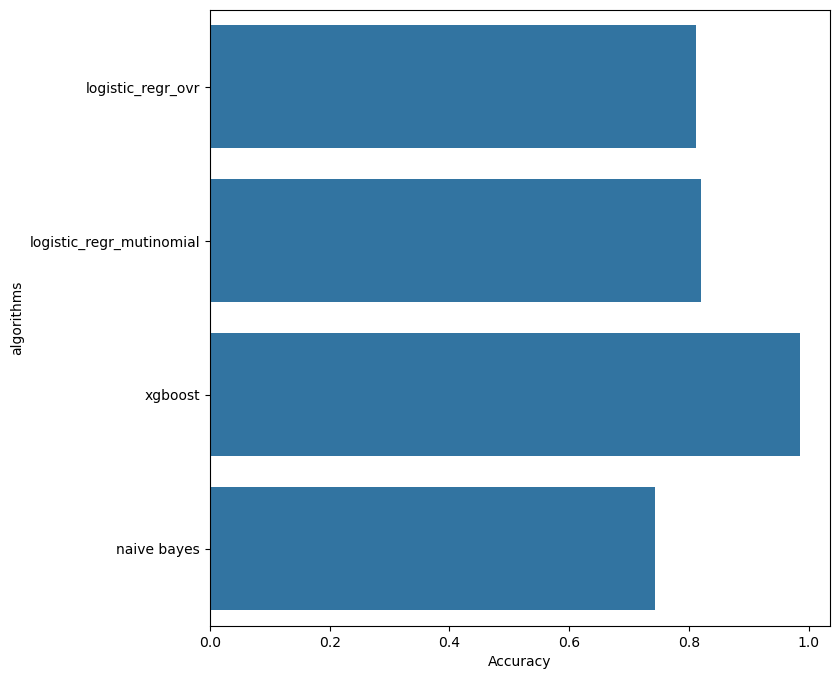

In [94]:
plt.figure(figsize=(8, 8))
a = sns.barplot(x='score', y='algorithms', data=result1)
a.set_xlabel('Accuracy')

As we can see that XGBoost performs good for that given data 

In [95]:
xgb_classifier=xgb.XGBClassifier(n_jobs=-1)

In [96]:
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [97]:
pred=xgb_classifier.predict(x_test)

In [98]:
from sklearn.metrics import confusion_matrix,classification_report

In [99]:
confusion_matrix(y_test,pred)

array([[ 23186,   1069,      0],
       [   797, 133232,    203],
       [     4,    485,  21827]], dtype=int64)

In [100]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     24255
           1       0.99      0.99      0.99    134232
           2       0.99      0.98      0.98     22316

    accuracy                           0.99    180803
   macro avg       0.98      0.98      0.98    180803
weighted avg       0.99      0.99      0.99    180803



In [101]:
# import dill
# model_file=open("xgb_classifier.pkl","wb")
# dill.dump(xgb_classifier,model_file)
# model_file.close()

In [102]:
# dill.dump(vectorizer, open("vectorizer.pkl", "wb"))

In [103]:
password="abc123@ABC"

In [104]:
password=vectorizer.transform([password])

In [105]:
xgb_classifier.predict(password)

array([1], dtype=int64)

In [106]:
a=xgb_classifier.predict_proba(password)

In [107]:
a

array([[6.2448735e-04, 9.7911316e-01, 2.0262379e-02]], dtype=float32)

In [108]:
a[0][1]

0.97911316